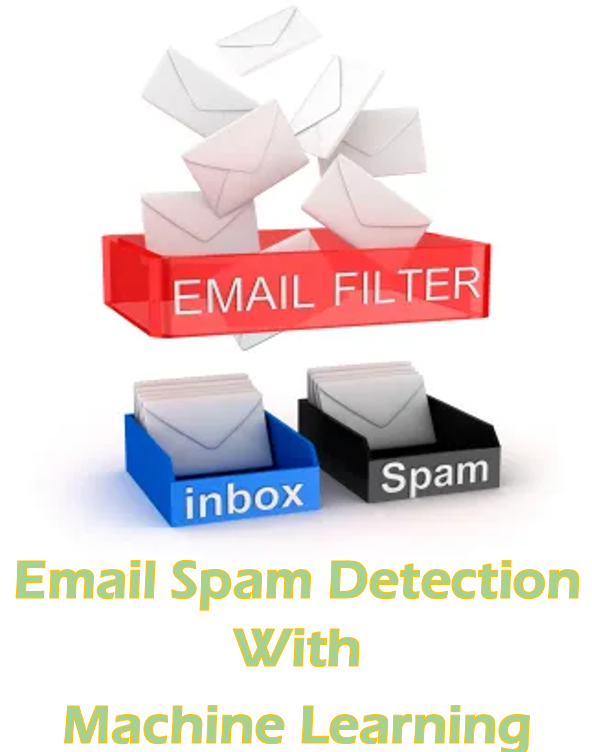

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from wordcloud import WordCloud
from tqdm.auto import tqdm
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading Dataset

In [2]:
data = pd.read_csv("E:\Infobyte\Task-4 Email Spam Detection\spam.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
data.shape

(5572, 2)

In [7]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [8]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data.isna().any()

v1    False
v2    False
dtype: bool

In [12]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [13]:
# Checking Duplicate
data.duplicated().any()

True

In [14]:
data.nunique()

v1       2
v2    5169
dtype: int64

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.duplicated().sum()

0

In [17]:
# Renaming
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [18]:
data.sample(5)

,target,text
2328,ham,That day you asked about anand number. Why:-)
1416,ham,No..few hours before.went to hair cut .
1972,ham,Yes but can we meet in town cos will go to gep...
1505,ham,Total video converter free download type this ...
62,ham,Its a part of checking IQ


## Data Analysis

In [19]:
# ENCODING
encoder=LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [20]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

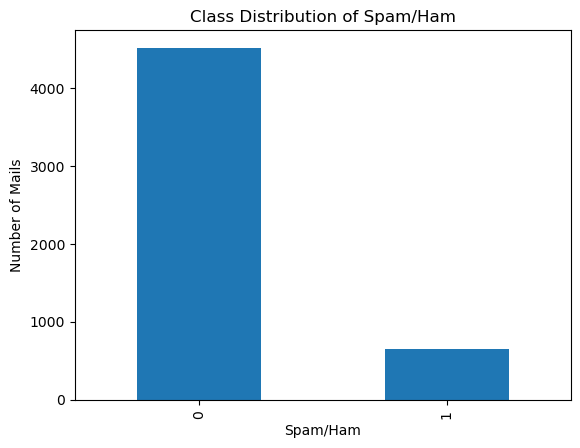

In [21]:
# Create a bar plot of the class distribution
class_counts = data['target'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

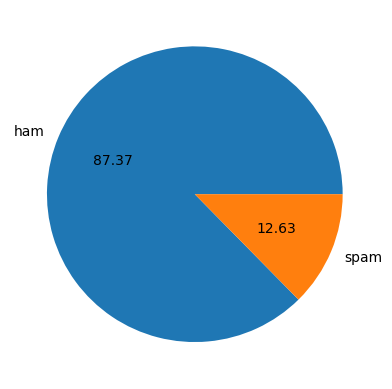

In [22]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

###### Data is imbalanced

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
data['num_characters'] = data['text'].apply(len)

In [25]:
# Add 'number of words' in text as new column
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
# Add 'number of sentences' in text as new column
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# Describe
data.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [29]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# 'ham' details describe
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# 'spam' data details describe
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
data[data['target']==0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

## Data Visualization

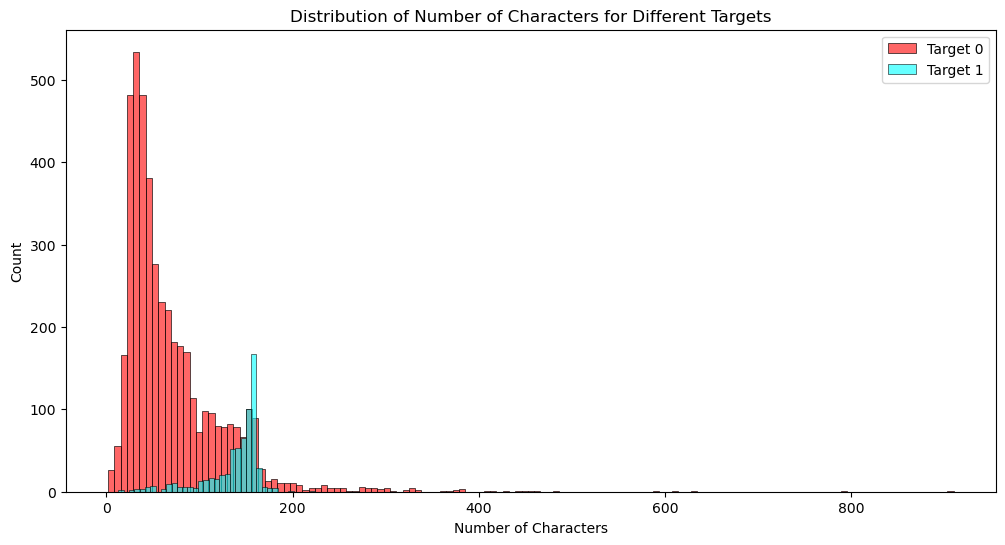

In [33]:
plt.figure(figsize=(12, 6))

sns.histplot(data[data['target'] == 0]['num_characters'], color='red', label='Target 0', alpha=0.6)
sns.histplot(data[data['target'] == 1]['num_characters'], color='cyan', label='Target 1', alpha=0.6)

plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.title('Distribution of Number of Characters for Different Targets')
plt.legend()

plt.show()

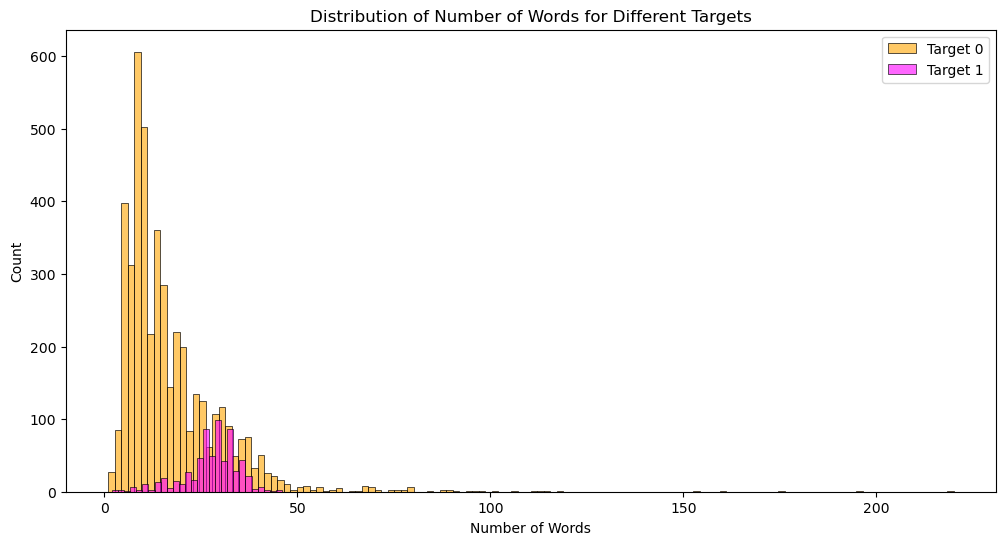

In [34]:
plt.figure(figsize=(12, 6))

sns.histplot(data[data['target'] == 0]['num_words'], color='orange', label='Target 0', alpha=0.6)
sns.histplot(data[data['target'] == 1]['num_words'], color='magenta', label='Target 1', alpha=0.6)

plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Number of Words for Different Targets')
plt.legend()

plt.show()

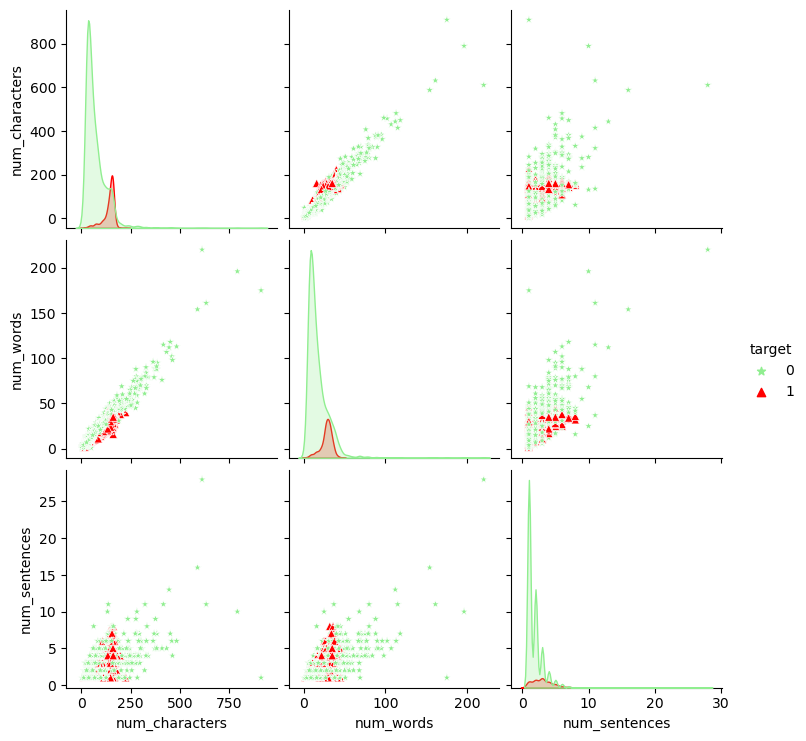

In [35]:
data['target'] = data['target'].astype('category')
custom_palette = ['lightgreen', 'red']
sns.pairplot(data, hue='target', diag_kind='kde', markers=["*", "^"], palette=custom_palette)
plt.show()

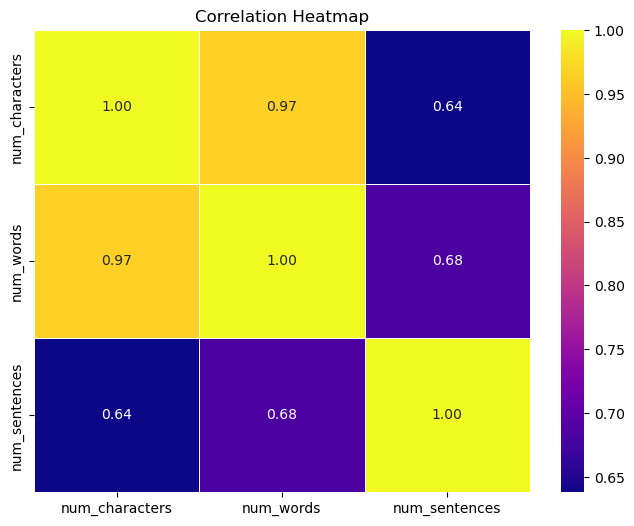

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

### We have two type of Correlation :-
###### Positive = One variable increases, other variable also increases.
###### Negative =  One variable decreases, other variable increases.

## Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [37]:
port_stem = PorterStemmer()

In [38]:
def transform_text(text):
    transform_text=re.sub('[^a-zA-Z]',' ',text)
    transform_text=transform_text.lower()
    transform_text=nltk.word_tokenize(transform_text)  # split
    transform_text=[port_stem.stem(word) for word in transform_text if not word in stopwords.words('english')]
    transform_text=' '.join(transform_text)
    return transform_text

In [39]:
data['text']=data['text'].apply(transform_text)

In [40]:
data['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [41]:
data['transformed_text'] = data['text'].apply(transform_text)

In [42]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go jurong point crazi avail bugi n great world...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though,61,15,1,nah think goe usf live around though


##### WordCloud

In [43]:
from wordcloud import WordCloud

In [44]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white', colormap='plasma')

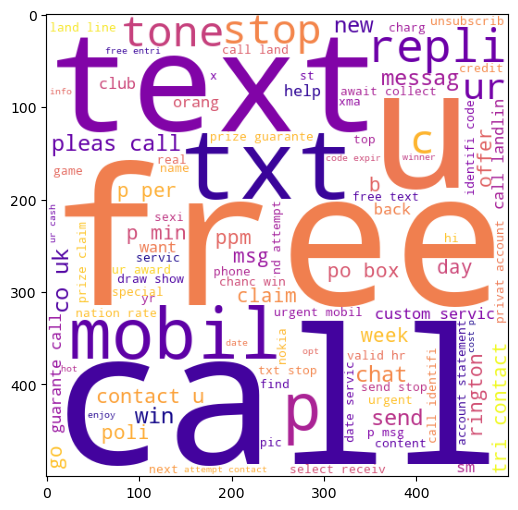

In [45]:
# Spam
spam_wc=wc.generate(data[data['target']==1]['text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

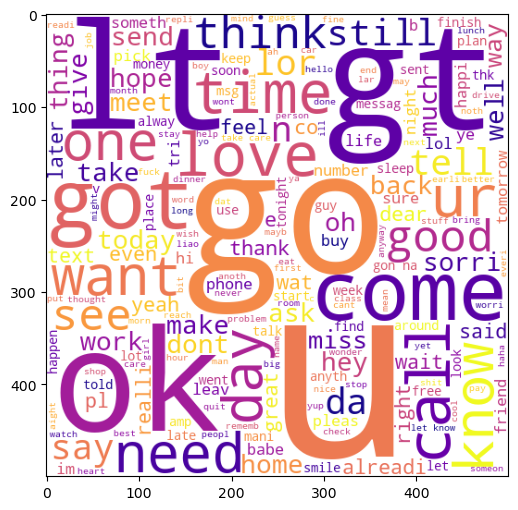

In [46]:
# Ham
ham_wc=wc.generate(data[data['target']==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
spam_corpus =[]
for msg in data[data['target']==1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

10078

In [49]:
from collections import Counter

Counter(spam_corpus)
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,call,346
1,free,197
2,p,158
3,u,157
4,txt,152
5,text,129
6,mobil,121
7,ur,119
8,stop,114
9,repli,104


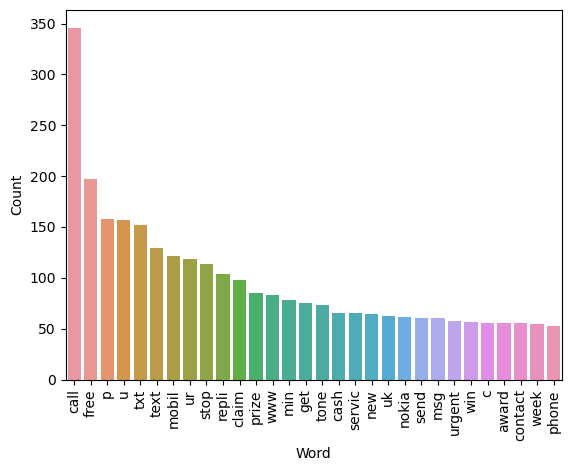

In [50]:
word_counts = Counter(spam_corpus)
word_counts_data = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=word_counts_data)
plt.xticks(rotation='vertical')
plt.show()


In [51]:
ham_corpus =[]
for msg in data[data['target']==0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35481

In [53]:
pd.DataFrame(Counter(ham_corpus).most_common(10))

,0,1
0,u,922
1,go,409
2,get,358
3,gt,288
4,lt,287
5,come,277
6,ok,255
7,call,240
8,got,239
9,like,236


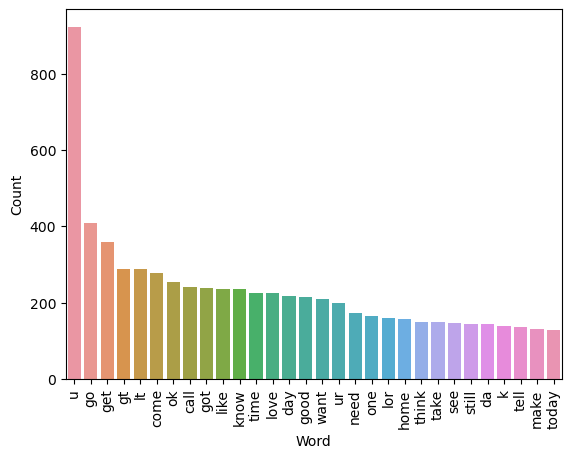

In [54]:
word_counts = Counter(ham_corpus)
word_counts_data = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

sns.barplot(data=word_counts_data, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [55]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go jurong point crazi avail bugi n great world...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though,61,15,1,nah think goe usf live around though


# Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [58]:
print(X.shape)
print()
print(X)

(5169, 3000)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
Y = data['target'].values
Y

[0, 0, 1, 0, 0, ..., 1, 0, 0, 0, 0]
Length: 5169
Categories (2, int64): [0, 1]

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [61]:
print(Y_train)
print(X_train)
print(Y_train)

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 4135
Categories (2, int64): [0, 1]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 4135
Categories (2, int64): [0, 1]


In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [65]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [66]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[894   2]
 [ 15 123]]
0.984


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [71]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9669421487603306)

In [72]:
models = [SVC(),
          MultinomialNB(),
         LogisticRegression(),
         DecisionTreeClassifier(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         AdaBoostClassifier(),
         BaggingClassifier(), 
         ExtraTreesClassifier(), 
         GradientBoostingClassifier(),
         XGBClassifier()]
model_title = ['SVC','MultinomialNB','logisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier',
               'AdaBoostClassifier','BaggingClassifier','ExtraTreesClassifier','GradientBoostingClassifier','XGBClassifier']

In [73]:
train_score =[]
test_score=[]
prediction = []
for i,modell in enumerate(models):
    modell.fit(X_train,Y_train)
    print("Model :",model_title[i])
    prediction = modell.predict(X_test)
    train_score.append(modell.score(X_train,Y_train))
    test_score.append(modell.score(X_test,Y_test))
    print("train score",modell.score(X_train,Y_train))
    print("test score",modell.score(X_test,Y_test))
    print(f1_score(Y_test,prediction))    
    print('\n')

Model : SVC
train score 0.9975816203143894
test score 0.9700193423597679
0.8764940239043825


Model : MultinomialNB
train score 0.9796856106408706
test score 0.9738878143133463
0.891566265060241


Model : logisticRegression
train score 0.9717049576783555
test score 0.9584139264990329
0.818565400843882


Model : DecisionTreeClassifier
train score 1.0
test score 0.9535783365570599
0.8248175182481752


Model : RandomForestClassifier
train score 1.0
test score 0.9748549323017408
0.8968253968253969


Model : KNeighborsClassifier
train score 0.9301088270858525
test score 0.9100580270793037
0.4918032786885246


Model : AdaBoostClassifier
train score 0.9799274486094317
test score 0.9700193423597679
0.8774703557312253


Model : BaggingClassifier
train score 0.9966142684401451
test score 0.9545454545454546
0.8239700374531834


Model : ExtraTreesClassifier
train score 1.0
test score 0.9796905222437138
0.9195402298850575


Model : GradientBoostingClassifier
train score 0.9828295042321644
test scor

In [ ]:
performance_data = []

for algorithm, classifier in clfs.items():
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    
    performance_data.append({'Algorithm': algorithm, 'Accuracy': accuracy, 'Precision': precision})

performance_data = pd.DataFrame(performance_data)

performance_data = performance_data.sort_values('Precision', ascending=False)

In [75]:
performance_data

,Algorithm,Accuracy,Precision
1,KN,0.910058,1.000000
2,NB,0.973888,1.000000
5,RF,0.973888,0.982609
8,ETC,0.976789,0.967213
0,SVC,0.975822,0.966942
6,AdaBoost,0.970019,0.965217
10,xgb,0.974855,0.959016
4,LR,0.957447,0.951923
9,GBDT,0.948743,0.929293
7,BgC,0.954545,0.832117


In [76]:
performance_data1 = pd.melt(performance_data, id_vars = "Algorithm")

In [77]:
performance_data1

,Algorithm,variable,value
0,KN,Accuracy,0.910058
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.976789
4,SVC,Accuracy,0.975822
5,AdaBoost,Accuracy,0.970019
6,xgb,Accuracy,0.974855
7,LR,Accuracy,0.957447
8,GBDT,Accuracy,0.948743
9,BgC,Accuracy,0.954545


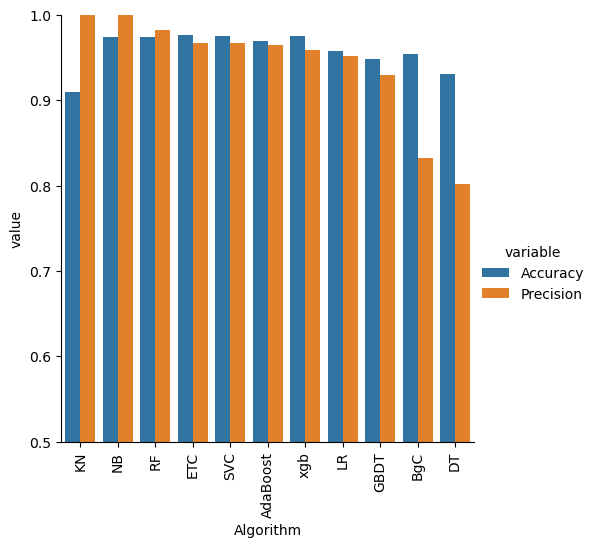

In [78]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_data1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [79]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [80]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [81]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [82]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [83]:
from sklearn.ensemble import StackingClassifier

In [84]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [85]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [86]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9845261121856866
Precision 0.9692307692307692


## MLP

In [94]:
from keras import models,layers
from keras.models import Sequential

In [95]:
model=Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(6217,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [108]:
from keras import optimizers
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

result = model.fit(X_train, Y_train_encoded, epochs=20, batch_size=128)

history_data = pd.DataFrame(result.history)

Epoch 1/20
33/33 [==============================] - 1s 9ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 2/20
33/33 [==============================] - 0s 15ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 3/20
33/33 [==============================] - 0s 14ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 4/20
33/33 [==============================] - 0s 15ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 5/20
33/33 [==============================] - 0s 12ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 6/20
33/33 [==============================] - 0s 10ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 7/20
33/33 [==============================] - 0s 10ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 8/20
33/33 [==============================] - 0s 10ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 9/20
33/33 [==============================] - 0s 9ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 10/20
33/33 [==============================] - 0s 9ms/step - loss: 1.9147 - accuracy: 0.0053
Epoch 11/20


In [110]:
history_data

,loss,accuracy
0,1.914684,0.00532
1,1.914684,0.00532
2,1.914684,0.00532
3,1.914684,0.00532
4,1.914684,0.00532
5,1.914684,0.00532
6,1.914684,0.00532
7,1.914684,0.00532
8,1.914684,0.00532
9,1.914684,0.00532


In [111]:
label_encoder = LabelEncoder()
Y_test_encoded = label_encoder.fit_transform(Y_test)

result2 = model.evaluate(X_test, Y_test_encoded)

33/33 [==============================] - 0s 4ms/step - loss: 2.0517 - accuracy: 0.0039


In [112]:
result2

[2.0517475605010986, 0.0038684720639139414]

In [113]:
predict = np.round(model.predict(X_test,batch_size=128,verbose=0),0)
predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [114]:
predicted_labels = np.argmax(predict, axis=1)

# Calculate the F1 score using 'micro' average
f1_micro = f1_score(Y_test, predicted_labels, average='micro')

# Calculate the F1 score using 'macro' average
f1_macro = f1_score(Y_test, predicted_labels, average='macro')

# Calculate the F1 score using 'weighted' average
f1_weighted = f1_score(Y_test, predicted_labels, average='weighted')

# Print the F1 scores
print("F1 score (micro):", f1_micro)
print("F1 score (macro):", f1_macro)
print("F1 score (weighted):", f1_weighted)

F1 score (micro): 0.29206963249516443
F1 score (macro): 0.0009242964481919598
F1 score (weighted): 0.40447355597475626
